   > ## Importation des librairies:

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> ## Importation des algorithmes:

In [180]:
from sklearn import datasets #sklearn est une mine d'or pour faire du machine learning dans Python.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

> ## Importation du jeu de donnees et description:

In [181]:
from sklearn.datasets import load_iris
#On doit definir quel jeu de donnees precisement.

In [182]:
iris=load_iris()
# On installe le jeu de donnees

In [183]:
iris.keys()# les attributs du jeu de donnees

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [184]:
print (iris.DESCR) # Description du jeu de donnees.

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [185]:
#A quoi cela ressemble?
#Notez que Python commence a 0, pas 1. Donc quand vous voulez sortir les 3 premieres rangees, commencez a 0.
print (iris.feature_names)
print (iris.data[0:3])
print (iris.target[0:3])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]


In [186]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [187]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


> ## Definition de la variable a predire:

In [188]:
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)#Transposons nos 10 features dans une dataframe: colonnes et rangees
df_iris['target'] = pd.Series(iris.target)# Transposons notre variable a predire dans une serie
y = iris.target #Definissons y comme etant notre variable a predire. y ici est une donnee quantitative certes 0,1,2,3... qui vise a classifier l'appartenance a telle ou telle classe.
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


> ## Exploration des donnees ou EDA: Exploratory Data Analysis:

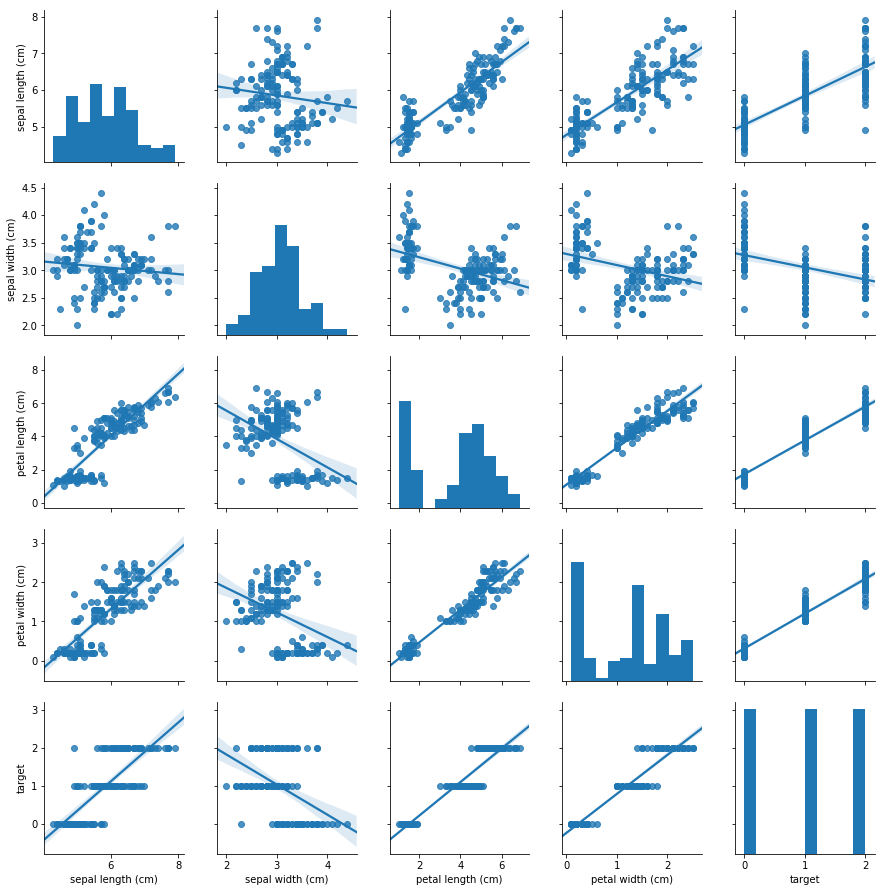

In [189]:
sns.pairplot(df_iris, kind="reg") #Observons la linearite ou pas de toutes nos variables les unes comparees aux autres.

In [190]:
#Definition de x et y
X=iris.data
y=iris.target

In [191]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


###  Standardisons nos donnees
La plupart des algorithmes de machine learning fonctionnent "mieux" lorsque les donnees sont standardisees ou normalisees.
Qu'est ce que la standardisation/normalisation des donnees? Et pourquoi pensez-vous que c'est important? 

#### Reponses:
> ##### Formules mathematiques: 

>  1) Standardisation: (x- moyenne x)/ecart-type

>  2) Normalisation: (x-valeur min x)/(valeur max x -valeur min x)

> Beaucoup d'algorithmes utilisent le concept de distance et donc si certaines variables x ont de tres grandes valeurs eloignees les unes des autres, cela peut fausser le processus d'apprentissage.

> L'algorithme KNN compare la distance (mathematique) entre les coordonnees x de l'observation dont on veut predire la classe (dans le jeu de donnees test) par rapport aux k autres observations dans le jeu de donnees d'apprentissage. La classe attribuee a l'observation en question est la classe majoritaire des k observations. 
> Quand il y a plusieurs x, (variables independentes) et que celles-ci sont ont des valeurs tres eloignees les unes des autres par exemple la masse et les degres pour predire l'appartenance a telle ou telle categories d'etoiles...Les valeurs masse varient entre 10^29 et 10^32, les valeurs temperatures varient entre 6000 degres et 100000 degres. Dans le calcul de la distance les valeurs masse vont tres largement dominer ce qui fait les valeurs degres ne vont presque pas compter.

> Tout ca pour expliquer le fonctionnement de KNN (simple) et pour demontrer l'importance des "distances".

> Sachez qu'il existe plusieurs distances mathematiques: Euclidean, Manhattan, Minkowski. NB: Euclidean (la plus utilisee est Minkowski ou p=2 et Manhattan quand p=1). KNN a tendance a utiliser la distance euclidienne. 

    

Importons donc une classe destinee a standardiser nos donnees, nous allons ici utiliser la standardisation

In [192]:
from sklearn.preprocessing import StandardScaler  

In [193]:
scaler = StandardScaler()
Xss = scaler.fit_transform(X)
Xss = pd.DataFrame(data=Xss,columns= iris['feature_names'][:4])
Xss.describe()
Xss.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [194]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


> ## Demarrage de la phase de test: 

In [195]:
from sklearn.model_selection import train_test_split 

**C'est la ou la partie learning de Machine Learning rentre en scene!**

Remarquez aussi **split**, cela signifie que l'on va diviser notre jeu de donnee en deux: une partie pour la premiere phase qui correspond a la phase d'**l'entrainement** de la machine et l'autre partie pour **tester** si ce que la machine aura appris est fiable.

In [196]:
X_train, X_test, y_train, y_test = train_test_split(Xss, y, test_size=0.5, random_state=42) 

In [197]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)



(75, 4)
(75, 4)
(75,)
(75,)


## Installation du modele KNN sur le jeu de donnees: ##

In [198]:
### On cree le modele
Xss = KNeighborsClassifier(n_neighbors=2, weights='uniform')

# On Fit/installe le modele sur notre jeu de donnees test
Xss.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [199]:
# Predict
pred1 = Xss.predict(X_test)
print( Xss.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 1 2 0 0 0 0 1 0 0 1 1
 0 0 0 1 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 1 0 1 1
 1]


> ### Evaluation du modele:

> #### 1) Calcul du score du modele:

In [200]:
print( Xss.score(X_test, y_test))
# A votre avis, comment est calcule le score?
#le score est ce que l'on appelle: accuracy qui est le % de predictions correctes sur toutes les predictions

0.9066666666666666


In [227]:
#Autre facon de calculer le score 
print(metrics.accuracy_score(y_test, pred1))

0.9066666666666666


> #### 2) Calcul de la valeur optimale de k:
k=1 apparait risque car on ne base notre prediction que sur une autre seule valeur meme si certes elle est proche
k=nombre d'observations est risque aussi car on encourt le risque d'attribuer la classe qui est majoritaire dans notre ensemble de donnees ce qui ne tient pas compte du concept de distance.

In [201]:
k_range = range(1, len(X_train))

In [202]:
scores = {}

In [110]:
for k in k_range:
    Xss = KNeighborsClassifier(n_neighbors=k, weights='uniform')

    # Fit the model
    Xss.fit(X_train, y_train)
    
    # Assess
    scores[k] = Xss.score(X_test, y_test)

scores

{1: 0.9733333333333334,
 2: 0.96,
 3: 0.9733333333333334,
 4: 0.9333333333333333,
 5: 0.9466666666666667,
 6: 0.9466666666666667,
 7: 0.9466666666666667,
 8: 0.9466666666666667,
 9: 0.96,
 10: 0.9466666666666667,
 11: 0.9466666666666667,
 12: 0.9466666666666667,
 13: 0.96,
 14: 0.9466666666666667,
 15: 0.9733333333333334,
 16: 0.96,
 17: 0.96,
 18: 0.9466666666666667,
 19: 0.96,
 20: 0.9466666666666667,
 21: 0.9466666666666667,
 22: 0.9466666666666667,
 23: 0.96,
 24: 0.9466666666666667,
 25: 0.9733333333333334,
 26: 0.9466666666666667,
 27: 0.9733333333333334,
 28: 0.96,
 29: 0.96,
 30: 0.9333333333333333,
 31: 0.9333333333333333,
 32: 0.9333333333333333,
 33: 0.9333333333333333,
 34: 0.92,
 35: 0.9333333333333333,
 36: 0.9066666666666666,
 37: 0.9066666666666666,
 38: 0.8933333333333333,
 39: 0.8933333333333333,
 40: 0.8933333333333333,
 41: 0.9466666666666667,
 42: 0.8933333333333333,
 43: 0.8933333333333333,
 44: 0.52,
 45: 0.5333333333333333,
 46: 0.52,
 47: 0.56,
 48: 0.52,
 49: 

> #### 3) Calcul de l'erreur du modele de base:

#### En classification, le modele de base est celui qui predit automatiquement l'appartenance a la classe majoritaire.

In [229]:
#Ici, nous transformons le format de y_test et passons d'une liste/tableau a une serie et ce pour pouvoir utiliser certaines
#fonctionnalites
np_array_y_test = y_test
print("NumPy array:")
print(np_array_y_test)
new_series_y_test = pd.Series(np_array_y_test)
print("Converted Pandas series:")
print(new_series_y_test)

NumPy array:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1]
Converted Pandas series:
0     1
1     0
2     2
3     1
4     1
     ..
70    2
71    0
72    2
73    2
74    1
Length: 75, dtype: int32


In [230]:
#Ici,nous regardons quelle est la classe majoritaire:0?1?2?
#On observe que la classe majoritaire est 0.
new_series_y_test.value_counts()

0    29
2    23
1    23
dtype: int64

In [239]:
# Ici, on cree notre modele de base qui va predire l'appartenance a la classe majoritaire dans 100% des cas.
baseline=new_series_y_test.value_counts().head(1)/len(new_series_y_test)#Cette formule retourne la proportion de la classe majoritaire.
baseline
#La classe majoritaire est majoritaire a 38%. Donc le niveau de precision du modele est de 38%.

0    0.386667
dtype: float64

### > Interpretation ###